In [20]:
!pip install -U tensorflow_datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
import tensorflow as tf
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

import math
import numpy as np
import matplotlib.pyplot as plt

In [22]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [23]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [24]:
class_names = metadata.features['label'].names
print("Class names: {}".format(class_names))

Class names: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [25]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Number of training examples: {}".format(num_train_examples))
print("Number of test examples:     {}".format(num_test_examples))

Number of training examples: 60000
Number of test examples:     10000


In [26]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels


train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

train_dataset = train_dataset.cache()
test_dataset = test_dataset.cache()

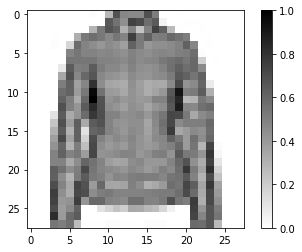

In [27]:
for image, label in test_dataset.take(1):
  break
image = image.numpy().reshape((28, 28))

plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

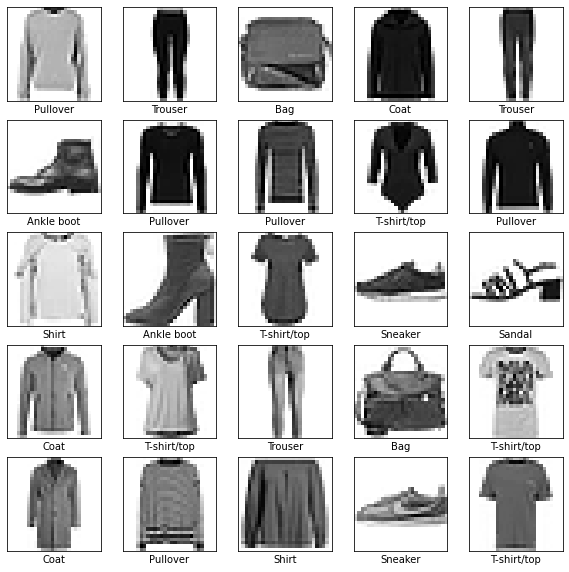

In [28]:
plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(train_dataset.take(25)):
  image = image.numpy().reshape((28, 28))
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image, cmap=plt.cm.binary)
  plt.xlabel(class_names[label])

plt.show

In [29]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation = tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [30]:
model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [31]:
BATCH_SIZE = 32
train_dataset = train_dataset.cache().repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.cache().batch(BATCH_SIZE)

In [32]:
model.fit(train_dataset, epochs=20, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/20
1875/1875 [==============================] - 28s 10ms/step - loss: 0.4901 - accuracy: 0.8289
Epoch 2/20
1875/1875 [==============================] - 12s 7ms/step - loss: 0.3707 - accuracy: 0.8648
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3338 - accuracy: 0.8791
Epoch 4/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3044 - accuracy: 0.8881
Epoch 5/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2906 - accuracy: 0.8924
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2767 - accuracy: 0.8971
Epoch 7/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2637 - accuracy: 0.9007
Epoch 8/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2510 - accuracy: 0.9062
Epoch 9/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2426 - accuracy: 0.9092
Epoch 10/20
1875/1875 [==============================] - 8s 5ms/step - loss: 0.

In [33]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/BATCH_SIZE))
print("Accuracy on test dataset:", test_accuracy)

313/313 [==============================] - 3s 7ms/step - loss: 0.3709 - accuracy: 0.8854
Accuracy on test dataset: 0.8853999972343445


In [34]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

1/1 [==============================] - 0s 57ms/step


In [35]:
predictions.shape

(32, 10)

In [36]:
predictions[0]

array([5.7868295e-08, 2.4013733e-09, 4.9016438e-04, 1.0282621e-08,
       9.9557346e-01, 4.1803666e-19, 3.9363280e-03, 1.3215387e-16,
       1.8023907e-10, 4.5266230e-10], dtype=float32)

In [37]:
np.argmax(predictions[0])

4

In [38]:
test_labels[0]

4

In [42]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

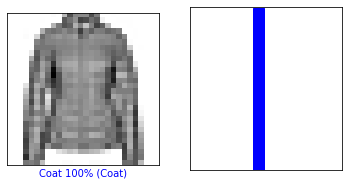

In [43]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

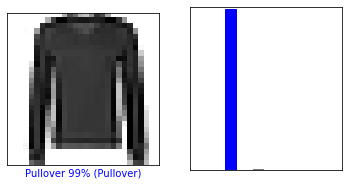

In [44]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

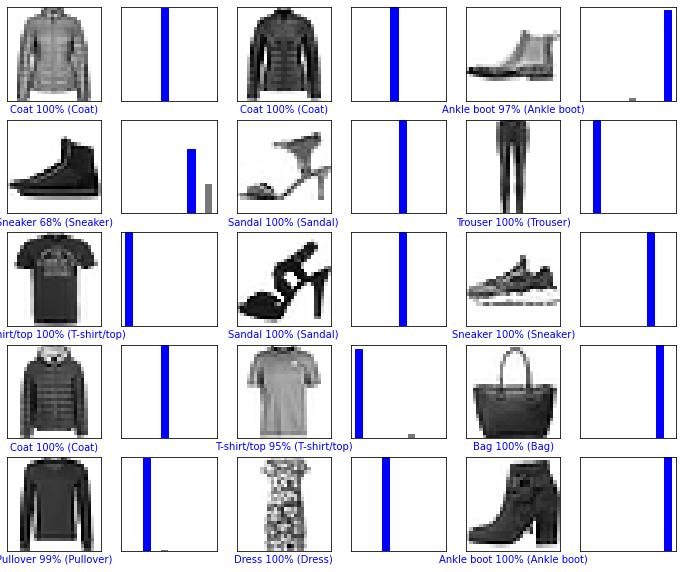

In [51]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)


In [52]:
img = test_images[0]

print(img.shape)

(28, 28, 1)


In [53]:
img = np.array([img])

print(img.shape)

(1, 28, 28, 1)


In [48]:
predictions_single = model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 105ms/step
[[5.7868299e-08 2.4013644e-09 4.9016369e-04 1.0282602e-08 9.9557352e-01
  4.1803826e-19 3.9363210e-03 1.3215438e-16 1.8023978e-10 4.5266407e-10]]


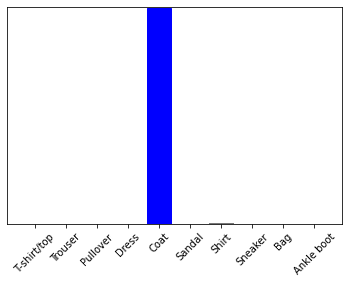

In [49]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [50]:
np.argmax(predictions_single[0])

4